# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
competitors = ["ADWIN", "HDDM", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "mHealth"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}",
                                     usecols=["dataset", eval_score], compression="gzip")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,ADWIN,HDDM,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,mHealth_Subject1_Ankle_X-Acc,0.497,0.447,0.086,0.536,0.086,0.311,0.331,0.601
1,mHealth_Subject1_Ankle_Y-Acc,0.625,0.277,0.086,0.347,0.086,0.390,0.279,0.758
2,mHealth_Subject1_Ankle_Z-Acc,0.566,0.357,0.086,0.495,0.173,0.413,0.307,0.750
3,mHealth_Subject1_Ankle_X-Gyro,0.591,0.302,0.086,0.435,0.240,0.086,0.456,0.607
4,mHealth_Subject1_Ankle_Y-Gyro,0.517,0.289,0.086,0.347,0.086,0.086,0.354,0.694
5,mHealth_Subject1_Ankle_Z-Gyro,0.552,0.276,0.086,0.260,0.171,0.086,0.389,0.766
6,mHealth_Subject1_Ankle_X-Mag,0.198,0.129,0.086,0.304,0.404,0.226,0.284,0.797
7,mHealth_Subject1_Ankle_Y-Mag,0.243,0.111,0.086,0.305,0.323,0.182,0.334,0.602
8,mHealth_Subject1_Ankle_Z-Mag,0.323,0.186,0.086,0.358,0.086,0.230,0.269,0.741
9,mHealth_Subject2_Ankle_X-Acc,0.509,0.633,0.087,0.346,0.087,0.306,0.406,0.545


Let's calculate the mean/median/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4045/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ADWIN           0.489
HDDM            0.297
NEWMA           0.087
ChangeFinder    0.427
DDM             0.162
Window          0.221
FLOSS           0.344
ClaSS           0.670
dtype: float64

In [6]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4045/803467923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ADWIN           0.526
HDDM            0.299
NEWMA           0.087
ChangeFinder    0.436
DDM             0.164
Window          0.235
FLOSS           0.339
ClaSS           0.660
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4045/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ADWIN           0.163
HDDM            0.114
NEWMA           0.001
ChangeFinder    0.095
DDM             0.090
Window          0.111
FLOSS           0.049
ClaSS           0.096
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ADWIN:wins=15 rank=2.58889
HDDM:wins=3 rank=5.01111
NEWMA:wins=0 rank=7.2
ChangeFinder:wins=1 rank=3.13333
DDM:wins=0 rank=6.16667
Window:wins=0 rank=5.47778
FLOSS:wins=0 rank=4.21111
ClaSS:wins=72 rank=1.23333


Let's plot and output the ranks.

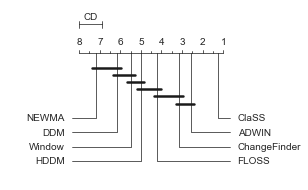

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4,
                                      filename=f"../../figures/cd_comparative_{dataset}.pdf")  #

Let's compute wins/losses against ClaSS.

In [11]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 73/1/16
ClaSS vs HDDM: (wins/ties/losses): 87/0/3
ClaSS vs NEWMA: (wins/ties/losses): 90/0/0
ClaSS vs ChangeFinder: (wins/ties/losses): 87/1/2
ClaSS vs DDM: (wins/ties/losses): 90/0/0
ClaSS vs Window: (wins/ties/losses): 90/0/0
ClaSS vs FLOSS: (wins/ties/losses): 90/0/0


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4045/3898032719.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4045/3898032719.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


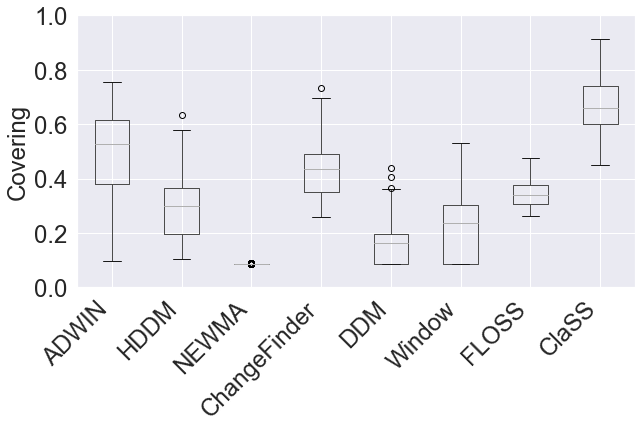

In [12]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight")